In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("Credit.csv", index_col=0)

for category in ["Gender", "Student", "Married", "Ethnicity"]:
    data[category] = data[category].astype("category")

data = pd.get_dummies(data, drop_first=True)

data.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,False,False,True,False,True
2,106.025,6645,483,3,82,15,903,True,True,True,True,False
3,104.593,7075,514,4,71,11,580,False,False,False,True,False
4,148.924,9504,681,3,36,11,964,True,False,False,True,False
5,55.882,4897,357,2,68,16,331,False,False,True,False,True


In [3]:
def evaluate_models(models, X, y):
    results = {}
    kf = KFold(n_splits=10, shuffle=True)
    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring="accuracy")
        results[name] = scores

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=pd.DataFrame(results))
    plt.title("Models Comparison")
    plt.ylabel("Accuracy")
    plt.xlabel("Models")
    plt.show()

In [12]:
def plot_decision_boundaries(model_name, model, X, y, features):
    le = LabelEncoder()
    encoded_y = le.fit_transform(y)

    x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
    y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    pipeline.fit(X[features], encoded_y)

    Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    n_classes = len(np.unique(encoded_y))
    cmap = ListedColormap(sns.color_palette("Set1", n_colors=n_classes))

    plt.figure(figsize=(10, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    sns.scatterplot(x=features[0], y=features[1], hue=y, data=X, palette=cmap.colors, edgecolor="k")
    plt.title(f"Decision Boundaries for {model_name}")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()


In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K Neighbors (k=5)": KNeighborsClassifier(n_neighbors=5),
}

### High Income Prediction

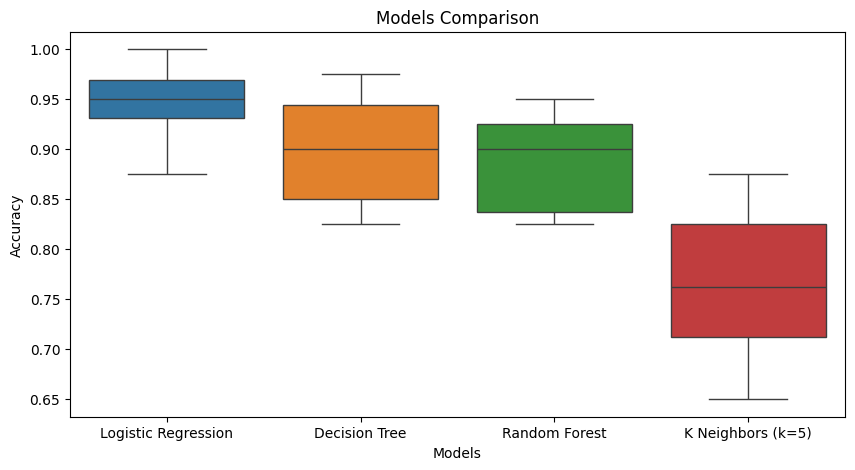

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


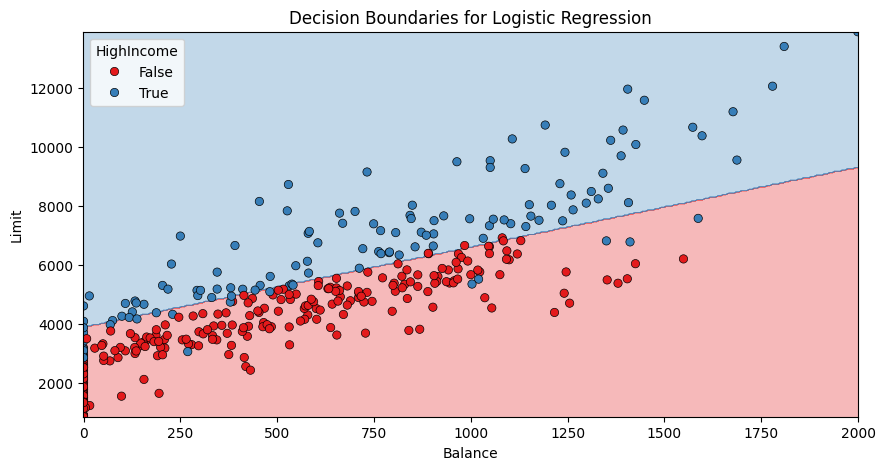

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


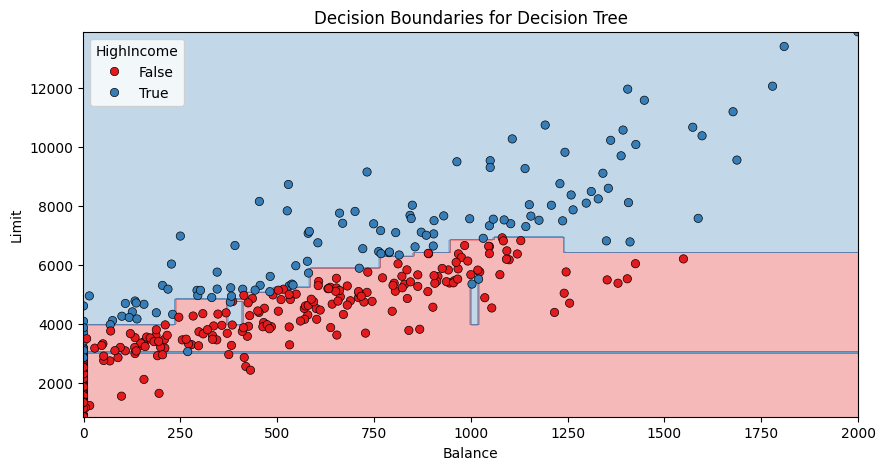

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


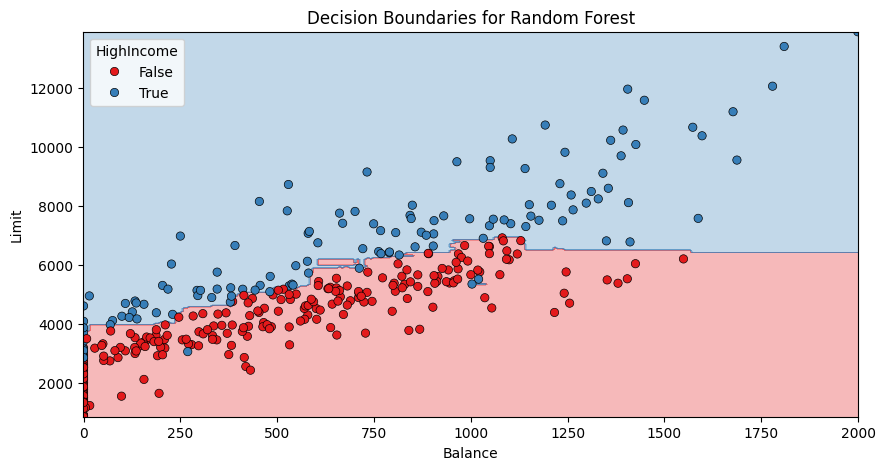

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


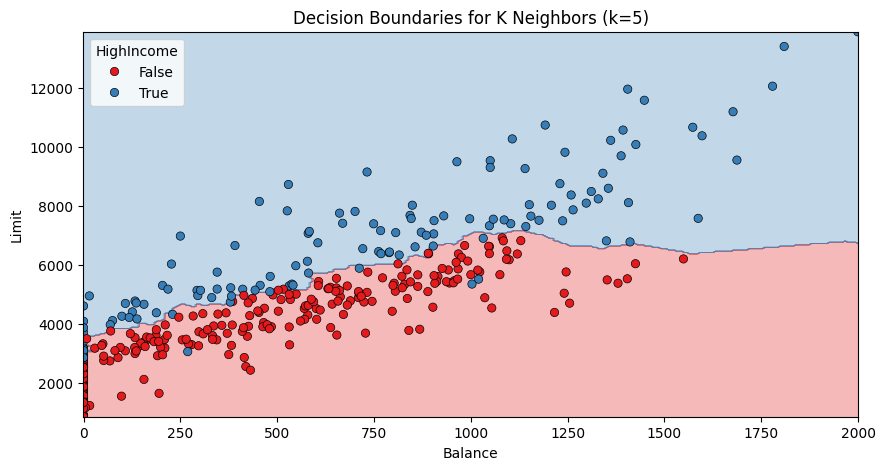

In [13]:
high_income_data = data.copy()
high_income_data["HighIncome"] = (high_income_data["Income"] > 50).astype(bool)

X = high_income_data.drop(columns=["Income", "HighIncome"])
y = high_income_data["HighIncome"]

evaluate_models(models, X, y)

for name, model in models.items():
    plot_decision_boundaries(name, model, X, y, features=["Balance", "Limit"])

### Credits Card Number Prediction

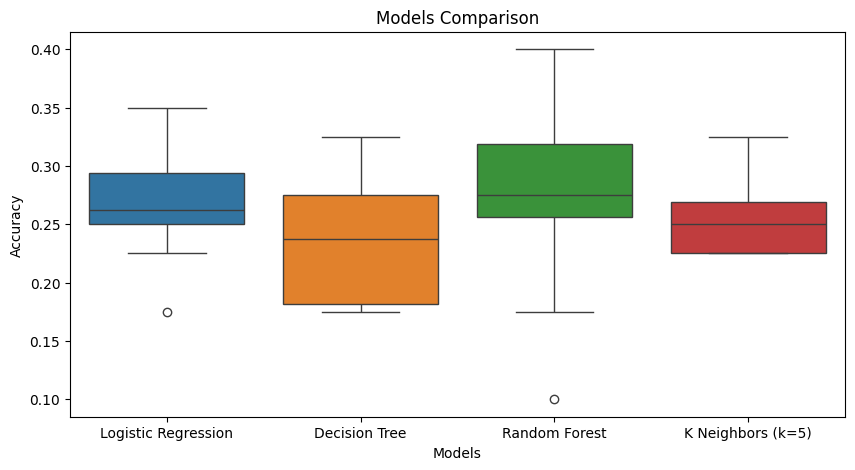

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


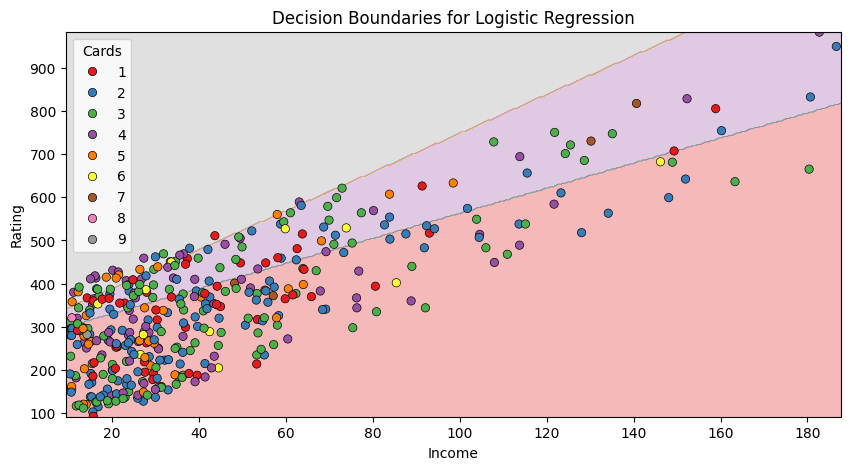

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


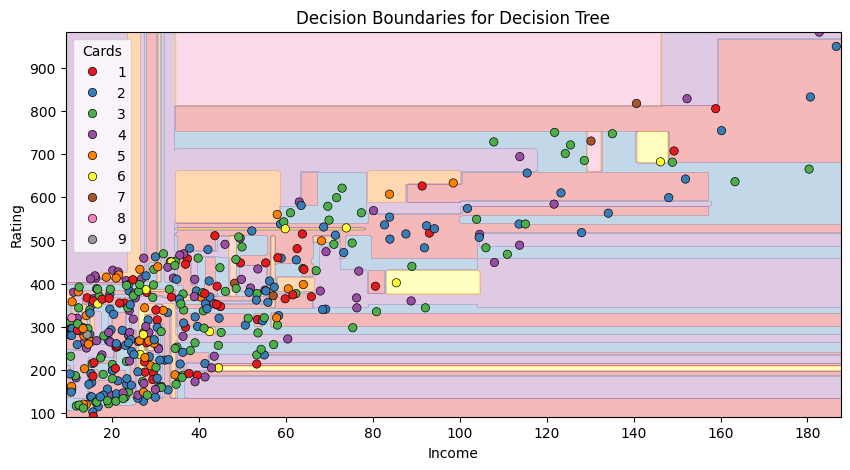

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


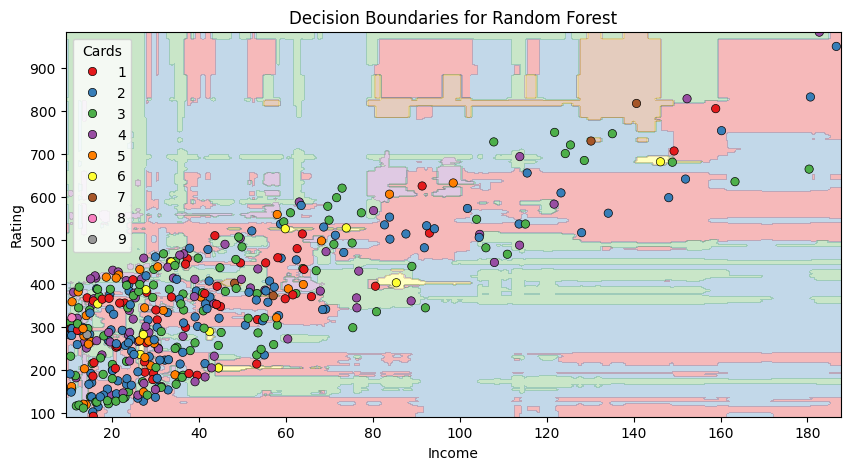

/home/karoljanic/Documents/project-studies/algorithmic-data-analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


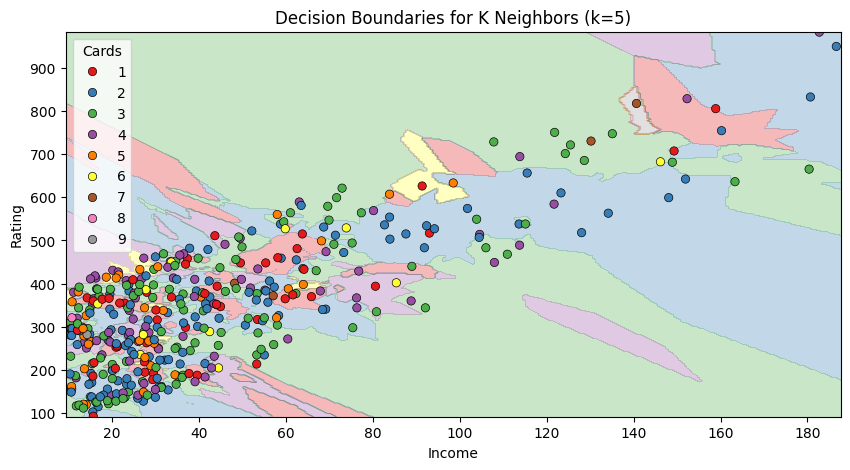

In [14]:
credits_card_data = data.copy()

X = credits_card_data.drop(columns=["Cards"])
y = credits_card_data["Cards"]

evaluate_models(models, X, y)
for name, model in models.items():
    plot_decision_boundaries(name, model, X, y, features=["Income", "Rating"])